5とそれ以外に分類

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [2]:

mnist = fetch_openml('mnist_784', version=1)
x_train, x_test = mnist['data'].iloc[:60000], mnist['data'].iloc[60000:]
y_train, y_test = mnist['target'].iloc[:60000], mnist['target'].iloc[60000:]
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)


In [3]:
clf = SVC()
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int8)

In [4]:
result = np.zeros((10, 10), dtype = np.int32)
for k in range(len(y_test)):
    i = prediction[k]
    j = y_test.iloc[k]
    result[i][j] += 1
result

array([[ 973,    0,    6,    0,    0,    2,    6,    0,    3,    3],
       [   0, 1126,    1,    0,    0,    0,    2,    6,    0,    4],
       [   1,    3, 1006,    2,    5,    0,    0,   11,    2,    1],
       [   0,    1,    2,  995,    0,    9,    0,    1,    6,    7],
       [   0,    0,    1,    0,  961,    0,    2,    1,    3,   10],
       [   2,    1,    0,    2,    0,  871,    3,    0,    2,    2],
       [   1,    1,    2,    0,    3,    4,  944,    0,    2,    1],
       [   1,    1,    7,    5,    0,    1,    0,  996,    3,    7],
       [   2,    2,    6,    5,    2,    4,    1,    2,  950,    4],
       [   0,    0,    1,    1,   11,    1,    0,   11,    3,  970]],
      dtype=int32)

In [5]:
for i in range(10):
    c = 0
    for j in range(10):
        c += result[j][i]
    print(i, c, format(result[i][i] / c, '.5f'))

0 980 0.99286
1 1135 0.99207
2 1032 0.97481
3 1010 0.98515
4 982 0.97862
5 892 0.97646
6 958 0.98539
7 1028 0.96887
8 974 0.97536
9 1009 0.96135


訓練データが正しく分類できること
正しく分類できていない場合を表示

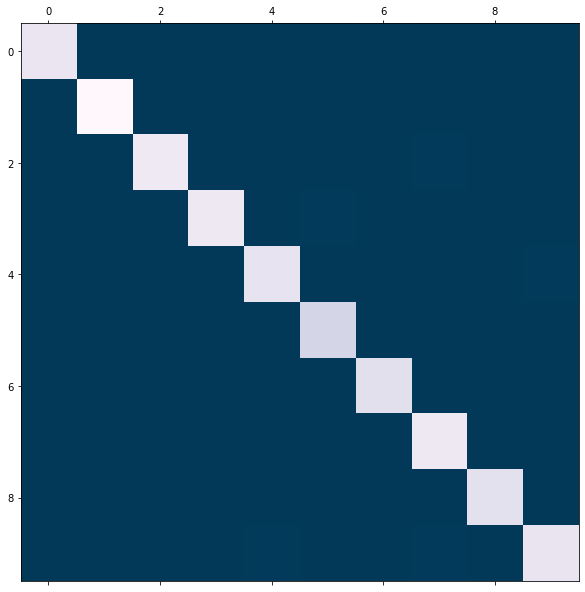

In [6]:
plt.figure(figsize=(10,10))
plt.matshow(result,cmap=plt.cm.PuBu_r,fignum=1)
plt.savefig('multiClassSVC.pdf')
plt.show()